In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cardio_vd = pd.read_csv("cardio_train.csv", index_col = 0, sep = ";")

# jag reagerar först och främst på att 'age' verkar vara i dagar? så jag ändrar det till år.
cardio_vd["age"] = round((cardio_vd['age']/ 365).astype('int64'))

# Fattas det data/ finns det tom kolumn?, svar nej all data är i skrivet
cardio_vd.isnull().sum()

cardio_vd.head()



,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
 # Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa? 
cardio_vd.cardio.value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

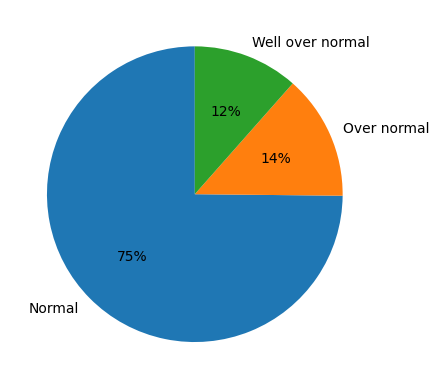

In [3]:
# Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

normal = (cardio_vd['cholesterol'] == 1).sum()
over_normal = (cardio_vd['cholesterol']==2).sum()
well_over_normal = (cardio_vd['cholesterol'] ==3).sum()

labels = ['Normal', 'Over normal', 'Well over normal']
size = [normal,over_normal,well_over_normal]
plt.pie(size, labels= labels, autopct='%1.f%%', startangle= 90)

plt.show()


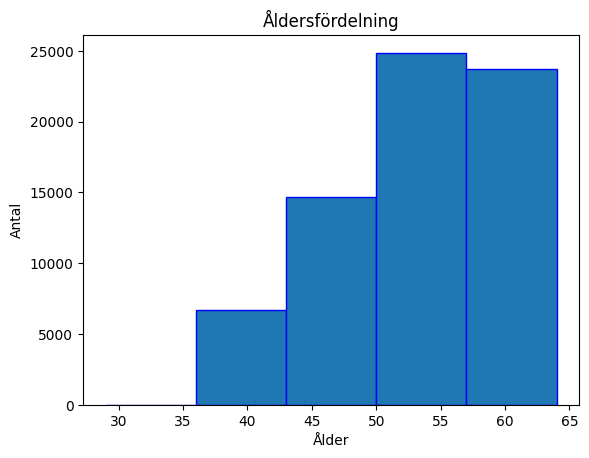

In [ ]:
# Hur ser åldersfördelningen ut? Rita ett histogram.
ages = cardio_vd["age"]

plt.hist(ages, bins = 5, edgecolor = 'blue')

plt.title("Åldersfördelning")
plt.xlabel("Ålder")
plt.ylabel("Antal")

plt.show()

In [5]:
# Hur stor andel röker?
andel_rokare = (cardio_vd.smoke.value_counts(normalize=True)*100)

andel_rokare.to_frame().round().astype(int).astype(str) + ' %'



,proportion
smoke,
0,91 %
1,9 %


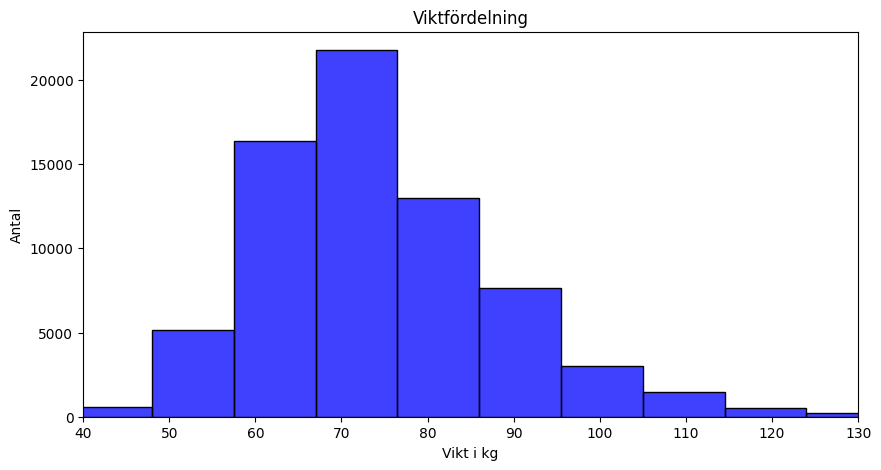

In [6]:
# Hur ser viktfördelningen ut? rita lämpligt diagram.

plt.figure(figsize=(10,5))
sns.histplot(data=cardio_vd, x = 'weight',bins = 20, color = 'blue')

plt.title("Viktfördelning")
plt.xlabel("Vikt i kg")
plt.xlim(40,130)
plt.ylabel("Antal")
plt.show()

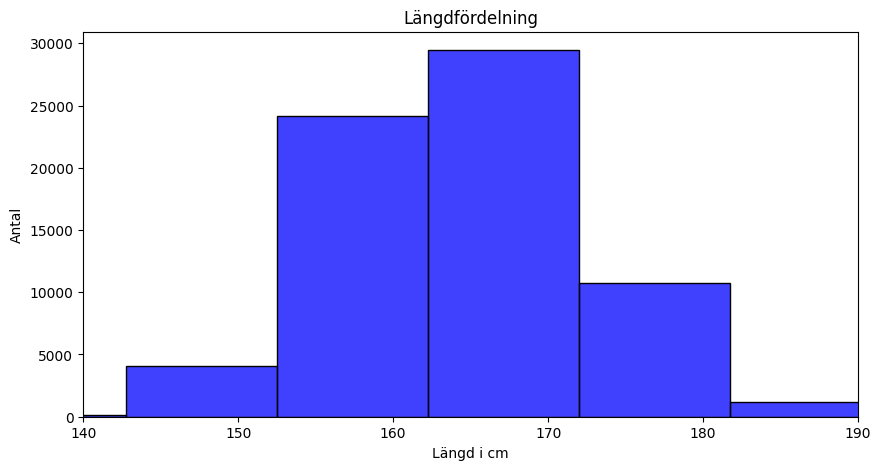

In [7]:
#Hur ser längdfördelningen ut? Rita lämpligt diagram.

plt.figure(figsize=(10,5))
sns.histplot(data=cardio_vd,x='height',bins = 20, color='blue')

plt.title('Längdfördelning')
plt.xlabel('Längd i cm')
plt.xlim(140, 190)
plt.ylabel('Antal')
plt.show()


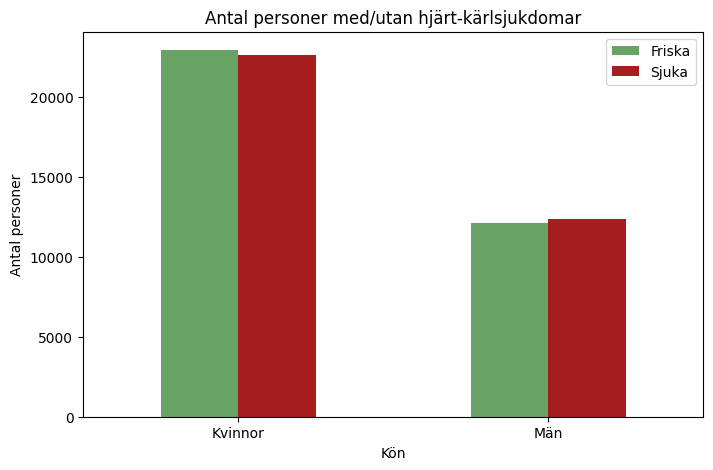

In [8]:
# Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

# antal män och kvinnor
cardio_vd["gender"].value_counts().to_frame()

# antal män och kvinnor som har hk sjukdom, 1 = kvinnor och 2 = män
andel_sjuka = cardio_vd.groupby(["gender", "cardio"])["cardio"].count().unstack()
andel_sjuka.head()

#diagram
andel_sjuka.plot(kind = "bar", figsize=(8,5), color=['#66a364', '#a61e1e'])
plt.title("Antal personer med/utan hjärt-kärlsjukdomar")
plt.xlabel("Kön")
# plt.xticks("Kvinnor", "Män")
plt.ylabel("Antal personer")

plt.legend(["Friska", "Sjuka"])
plt.xticks(ticks=[0,1], labels=["Kvinnor", "Män"], rotation = 0)
plt.show()




In [9]:
#  Feature engineering BMI

# BMI = vikten / längd * längd
bmi = cardio_vd['bmi'] = (cardio_vd['weight']/ (cardio_vd['height']*cardio_vd['height']))*10000


#jag valde att ta bort alla under 18.5 samt över 40 då de över under extrem undervikt samt över extrem fetma
cardio_vd = cardio_vd[(cardio_vd['bmi'] >= 18.5) & (cardio_vd['bmi'] <= 45)]
cardio_vd['bmi'] = cardio_vd['bmi'].round(2)



    
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Weightloss'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overwieght'
    elif 30 <= bmi < 35:
        return 'Obese class I'
    elif 35<= bmi < 40:
        return 'Obese class II'
    else: 
        return 'Obese class III'

cardio_vd['BMI_category'] = cardio_vd['bmi'].apply(categorize_bmi)

cardio_vd


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,BMI_category
id,,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,Normal
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,Obese class I
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,Normal
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,Overwieght
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,57,1,165,80.0,150,80,1,1,0,0,1,1,29.38,Overwieght
99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.93,Overwieght
99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.35,Obese class I


In [ ]:
#  Feature engineering blodtryck

# Systolic blood pressure = ap_hi      Healthy less than 120, Elevated 120-129, Stage 1 hypertension 130-139, Stage 2 hypertension +140, Hypertension crisis +180
# Diastolic blood pressure = ap_lo     Healthy AND less than 80, Elevated AND LESS THEN 80, Stage 1 hypertension OR 80-89, Stage 2 hypertension OR +90, Hypertension crisis OR +120



#jag valde att ta bort alla under 110 samt över 180 då de över under extrem under samt över extremt över
cardio_vd.drop(cardio_vd[(cardio_vd['ap_hi'] < 110) | (cardio_vd['ap_hi'] > 180)].index, inplace=True)

 #jag valde att ta bort alla under 70 samt över 130 då de över under extrem under samt över extremt över
cardio_vd.drop(cardio_vd[(cardio_vd['ap_lo'] < 70) | (cardio_vd['ap_lo'] > 130)].index, inplace=True)


# funktion för att kategorisera blodtryck baserat på ap_hi och ap_lo
def categorize_blood_pressure(row):
    ap_hi = row['ap_hi']
    ap_lo = row['ap_lo']
    
    if ap_hi < 120 and ap_lo < 80:
        return 'Healthy'
    elif 120 <= ap_hi < 130 and ap_lo < 80:
        return 'Elevated'
    elif (130 <= ap_hi < 140) or (80 <= ap_lo < 90):
        return 'Stage 1 Hypertension'
    elif (140 <= ap_hi < 180) or (ap_lo >= 90):
        return 'Stage 2 Hypertension'
    elif (ap_hi >= 180) or (ap_lo > 120):
        return 'Hypertensive Crisis'
    else:
        return 'Unknown'

#  en kolumn som hter blood pressure category
cardio_vd['blood_pressure_category'] = cardio_vd.apply(categorize_blood_pressure, axis=1)

cardio_vd



,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,BMI_category,blood_pressure_category
id,,,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,Normal,Stage 1 Hypertension
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,Obese class I,Stage 2 Hypertension
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,Normal,Stage 1 Hypertension
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,Overwieght,Stage 2 Hypertension
8,60,1,151,67.0,120,80,2,2,0,0,0,0,29.38,Overwieght,Stage 1 Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,57,1,165,80.0,150,80,1,1,0,0,1,1,29.38,Overwieght,Stage 1 Hypertension
99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.93,Overwieght,Stage 1 Hypertension
99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.35,Obese class I,Stage 2 Hypertension


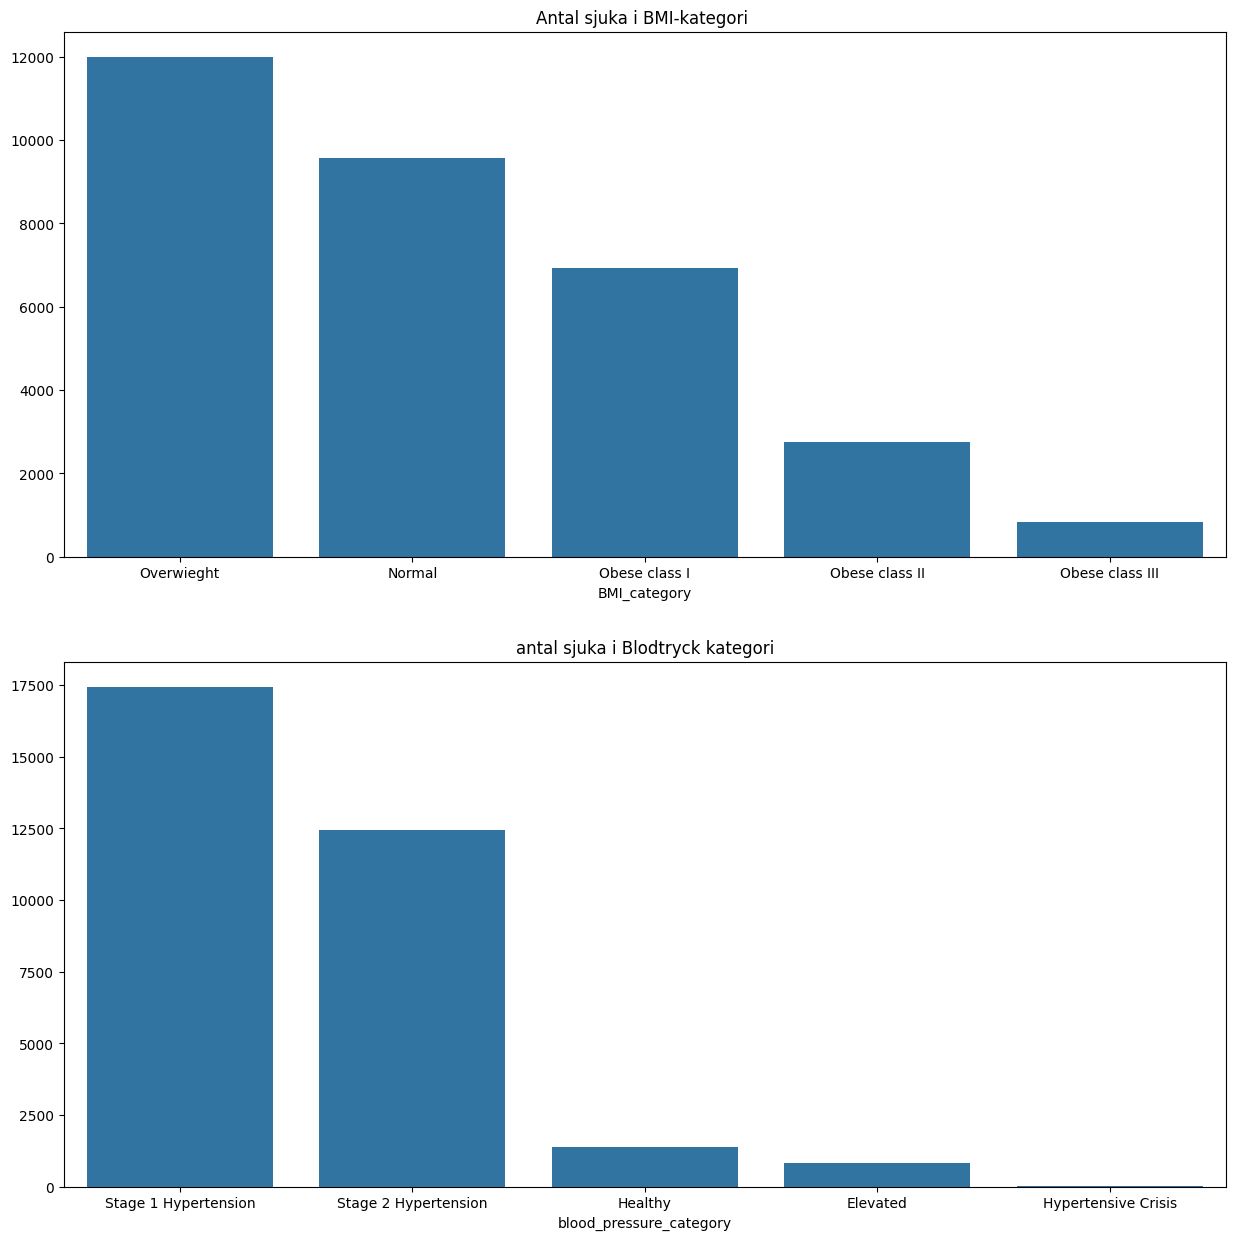

In [ ]:
#Visualisera sjukdomar

kategori_col = cardio_vd.select_dtypes(include= ["object"]).columns
titles = ["Antal sjuka i BMI-kategori ", "antal sjuka i Blodtryck kategori"]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# Loopar genom varje kategori och skapa plottar
for i, col in enumerate(kategori_col):
    data = cardio_vd[cardio_vd["cardio"] == 1][col].value_counts()
    sns.barplot(x=data.index, y=data.values, ax=axes[i])
    axes[i].set_title(titles[i])

plt.show() 

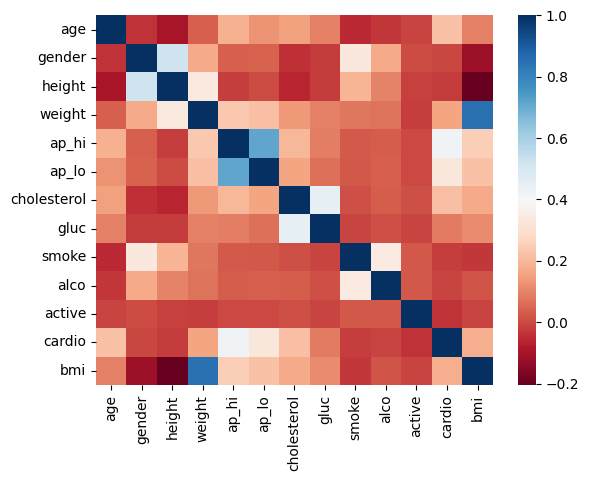

In [12]:
# Heatmap
# Jag kan se att vikt är starkt korrilerat med blodtryck, samt BMI men det är mer själklart pga dens formell, förklaringen till vikt och blodtryck skulle kunna vara att ju överviktigare en person är
# Desto mer "Fett" i artärkerna runt hjärtat också

numeric_df = cardio_vd.select_dtypes(include=['number'])  
sns.heatmap(numeric_df.corr(), annot=False, cmap =  'RdBu')
plt.show()


# Dataframe 1


In [13]:
#Dataframe 1 för kategorisk version

df1 = cardio_vd.copy()

columns_to_drop = ["ap_hi", "ap_lo", "height", "weight","bmi"]
df1 = df1.drop(columns=columns_to_drop)


df1_onehot = pd.get_dummies(df1, columns=["BMI_category", "blood_pressure_category", "gender"], drop_first=True)

df1_onehot

,age,cholesterol,gluc,smoke,alco,active,cardio,BMI_category_Obese class I,BMI_category_Obese class II,BMI_category_Obese class III,BMI_category_Overwieght,blood_pressure_category_Healthy,blood_pressure_category_Hypertensive Crisis,blood_pressure_category_Stage 1 Hypertension,blood_pressure_category_Stage 2 Hypertension,gender_2
id,,,,,,,,,,,,,,,,
0,50,1,1,0,0,1,0,False,False,False,False,False,False,True,False,True
1,55,3,1,0,0,1,1,True,False,False,False,False,False,False,True,False
2,51,3,1,0,0,0,1,False,False,False,False,False,False,True,False,False
3,48,1,1,0,0,1,1,False,False,False,True,False,False,False,True,True
8,60,2,2,0,0,0,0,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,57,1,1,0,0,1,1,False,False,False,True,False,False,True,False,False
99993,52,1,1,1,0,1,0,False,False,False,True,False,False,True,False,True
99996,52,3,1,0,1,0,1,True,False,False,False,False,False,False,True,True


In [14]:
#Dataframe 2 för numerisk version
df2 = cardio_vd.copy()

columns_to_drop = ["BMI_category", "blood_pressure_category", "height", "weight"]
df2 = df2.drop(columns=columns_to_drop)

df2_onehot = pd.get_dummies(df2, columns=["gender"], drop_first=True)

df2_onehot


,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_2
id,,,,,,,,,,,
0,50,110,80,1,1,0,0,1,0,21.97,True
1,55,140,90,3,1,0,0,1,1,34.93,False
2,51,130,70,3,1,0,0,0,1,23.51,False
3,48,150,100,1,1,0,0,1,1,28.71,True
8,60,120,80,2,2,0,0,0,0,29.38,False
...,...,...,...,...,...,...,...,...,...,...,...
99992,57,150,80,1,1,0,0,1,1,29.38,False
99993,52,120,80,1,1,1,0,1,0,26.93,True
99996,52,180,90,3,1,0,1,0,1,31.35,True


## Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix




# split datan för kategorisk version, jag väljer Logistic Regression här

#sära på datan som ska jämföras (kategoriska version dvs DF1)
X = df1_onehot.drop("cardio",  axis=1) 
y = df1_onehot["cardio"]

#split into train and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)


# pipeline för skalning och logistisk regression

logistic_pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("logistic", LogisticRegression(max_iter=2000))
])

# hyperparameterraster för GridSearchCV
param_grid = {
    "logistic__C": [ 0.1, 1, 10, 15],   
    "logistic__penalty": ["l1", "l2"],        
    "logistic__solver": ["liblinear", "saga"] 
}

# träna GridSearchCV
gs_lr = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy"
)
# predict och validering data
gs_lr.fit(X_train, y_train)
y_pred = gs_lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

evaluation_scores = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Confusion Matrix": cm
}
print(evaluation_scores)


# predict
y_preds = gs_lr.predict(X_test) 
print(f"Bästa score för logistik {gs_lr.best_score_}")
print(f"Bästa parametrar: {gs_lr.best_params_}")
y_preds





{'Accuracy': 0.6939987163029525, 'Precision': 0.7286848463928202, 'Confusion Matrix': array([[2214,  786],
       [1121, 2111]])}
Bästa score för logistik 0.6942627883650953
Bästa parametrar: {'logistic__C': 1, 'logistic__penalty': 'l2', 'logistic__solver': 'saga'}


array([1, 0, 0, ..., 1, 1, 0], shape=(6232,))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# split datan för nummerisk version, jag väljer Random Forest här

#sära på datan som ska jämföras (numerisk version dvs DF2)
X2 = df2_onehot.drop("cardio", axis=1)
y2 = df2_onehot["cardio"]


#split into train and test
X_train, X_temp, y_train, y_temp = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# pipeline för Random Forest
rf_pipeline = Pipeline([
    ("normalisering", MinMaxScaler()),
    ("randomforest", RandomForestClassifier(random_state=42))  
])

# hyperparameterraster för GridSearchCV
param_grid_RF = {
    "randomforest__n_estimators": [50, 100, 200],
    # "randomforest__max_depth": [None, 10, 20, 30],
    # "randomforest__min_samples_split": [2, 5, 10],
    # "randomforest__min_samples_leaf": [1, 2, 4]
}

#  träna GridSearchCV
gs_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_RF,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

gs_rf.fit(X_train, y_train)


# predict och validering data
y2_preds = gs_rf.predict(X_test)
accuracy = accuracy_score(y_test, y2_preds)
precision = precision_score(y_test, y2_preds)
cm = confusion_matrix(y_test, y2_preds)

# spara utvärderingsmått
evaluation_scores_rf = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Confusion Matrix": cm
}

print(f"Bästa score för Random Forest: {gs_rf.best_score_}")
print(f"Bästa parametrar: {gs_rf.best_params_}")
print(evaluation_scores_rf)


Bästa score för Random Forest: 0.6806820461384152
Bästa parametrar: {'randomforest__n_estimators': 200}
{'Accuracy': 0.6895057766367138, 'Precision': 0.7039088950446292, 'Confusion Matrix': array([[2010,  962],
       [ 973, 2287]])}


#  Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Sära på datan (numerisk version, dvs DF2)
X4 = df2_onehot.drop("cardio", axis=1)
y4 = df2_onehot["cardio"]

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# pipeline 
nb_pipeline = Pipeline([
    ("naive_bayes", GaussianNB())  
])

param_grid_NB = {
    "naive_bayes__var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]  # Regularisering för numerisk stabilitet
}

# träna GridSearchCV 
gs_nb = GridSearchCV(
    estimator=nb_pipeline,
    param_grid=param_grid_NB,
    cv=3,  # Mindre CV för snabbare träning
    scoring="accuracy",
    n_jobs=-1
)

gs_nb.fit(X_train, y_train)

# predict och validering data
y4_preds = gs_nb.predict(X_test)
accuracy = accuracy_score(y_test, y4_preds)
precision = precision_score(y_test, y4_preds)
cm = confusion_matrix(y_test, y4_preds)

# spara utvärderingsmått
evaluation_scores_nb = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Confusion Matrix": cm
}

print(f"Bästa score för Naive Bayes: {gs_nb.best_score_}")
print(f"Bästa parametrar: {gs_nb.best_params_}")
print(evaluation_scores_nb)


Bästa score för Naive Bayes: 0.7062787115232666
Bästa parametrar: {'naive_bayes__var_smoothing': 1e-09}
{'Accuracy': 0.7072133515205007, 'Precision': 0.777755749405234, 'Confusion Matrix': array([[4891, 1121],
       [2528, 3923]])}


In [18]:
# best estimators
best_lr = gs_lr.best_estimator_
best_rf = gs_rf.best_estimator_
best_nb = gs_nb.best_estimator_

best_lr,best_rf, best_nb

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('logistic',
                  LogisticRegression(C=1, max_iter=2000, solver='saga'))]),
 Pipeline(steps=[('normalisering', MinMaxScaler()),
                 ('randomforest',
                  RandomForestClassifier(n_estimators=200, random_state=42))]),
 Pipeline(steps=[('naive_bayes', GaussianNB())]))

In [ ]:
## utvärdering av modellens prestanda

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = gs_rf.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Noggrannhet på testdata: {accuracy}")

# klassificeringsrapport
print(f"Klassificeringsrapport:\n{classification_report(y_test, y_pred)}")

# confusion matrix
print(f"Förvirringsmatris:\n{confusion_matrix(y_test, y_pred)}")


Noggrannhet på testdata: 0.68891920083447
Klassificeringsrapport:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      6012
           1       0.70      0.71      0.70      6451

    accuracy                           0.69     12463
   macro avg       0.69      0.69      0.69     12463
weighted avg       0.69      0.69      0.69     12463

Förvirringsmatris:
[[4028 1984]
 [1893 4558]]


# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# parametrar från GridSearchCV
best_logistic = LogisticRegression(C=10, penalty="l1", solver="saga", max_iter=2000)
best_rf = RandomForestClassifier(n_estimators=200, random_state=42)
best_nb = GaussianNB(var_smoothing=1e-8)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ("logistic", best_logistic),
        ("random_forest", best_rf),
        ("naive_bayes", best_nb)
    ],
    voting="hard"  # Hard voting = majoritetsbeslut
)

# Träna modellen 
voting_clf.fit(X_train, y_train)

# Prediktion på testdata
y_pred_voting = voting_clf.predict(X_test)

